In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the data from the extracted CSV file
data = pd.read_csv('bank dataset.csv', sep=';')


In [3]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
# Preprocessing the data
# Convert categorical variables to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [5]:
# Define features and target variable
X = data.drop(columns=['y'])
y = data['y']

test_size=0.3:This specifies the proportion of the data that will be used for testing. In this case, 30% of the dataset will be used as the test set, while the remaining 70% will be used to train the model. // random_state=42, you guarantee that every time you run the code, the data will be split in the same way.

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42) initializes a Decision Tree Classifier for classification tasks.

In [7]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

train this classifier using .fit(X_train, y_train) to make it learn from your training data.

In [8]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

 predict outcomes on new data (test set) using .predict(X_test)

In [9]:
# Make predictions
y_pred = clf.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8875


The function accuracy_score computes the ratio of correctly predicted instances to the total number of instances

In [11]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1105
           1       0.47      0.55      0.51       131

    accuracy                           0.89      1236
   macro avg       0.71      0.74      0.72      1236
weighted avg       0.90      0.89      0.89      1236



confusion_matrix(y_test, y_pred) calculates the confusion matrix, which compares the true labels (y_test) to the predicted labels (y_pred).

In [12]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1025   80]
 [  59   72]]


plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['y'].classes_): Plots the decision tree using the trained model (clf), coloring the nodes, and labeling features and classes.

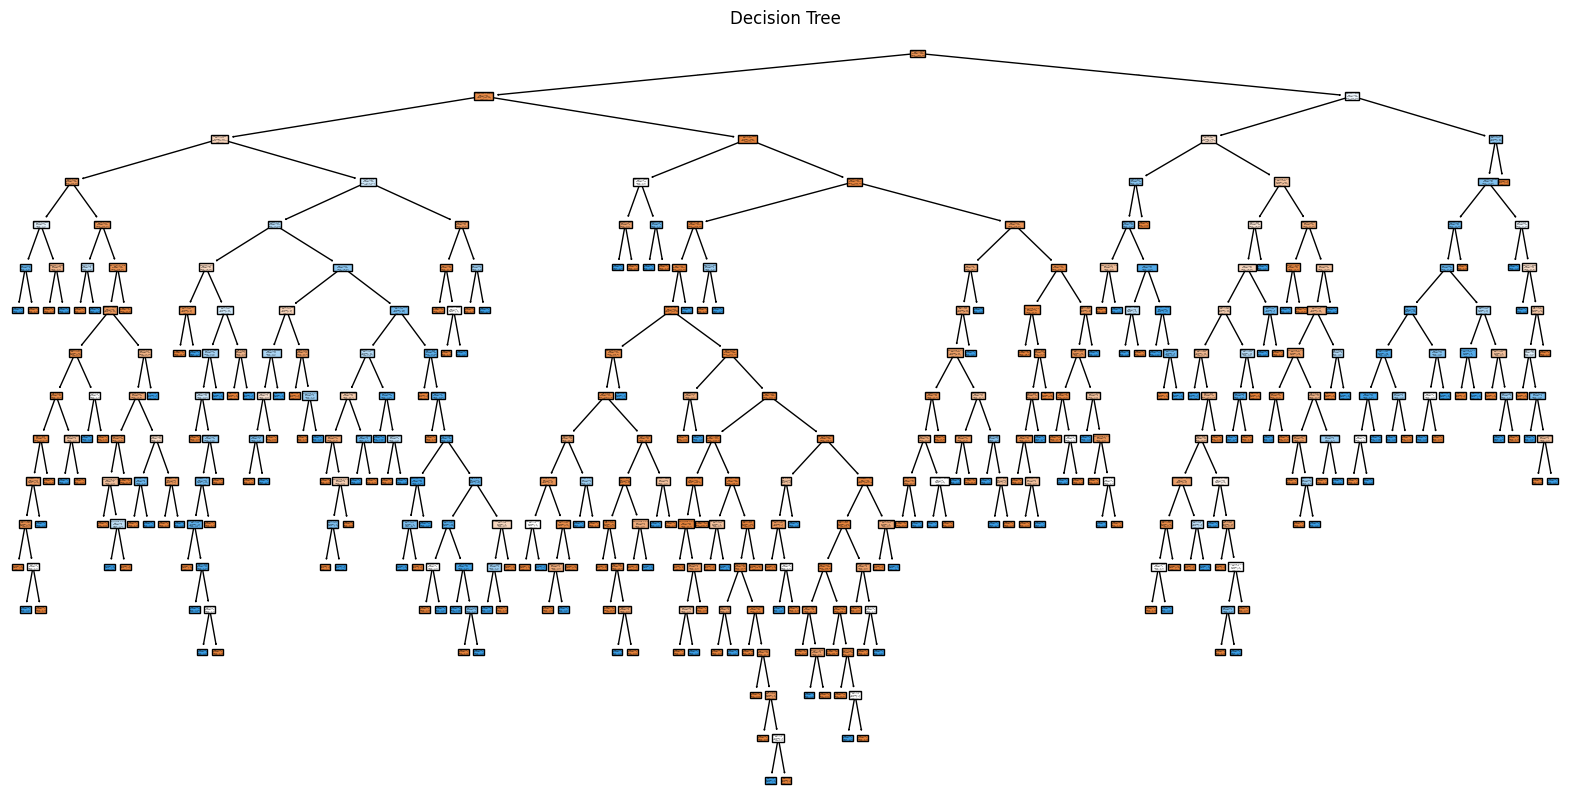

In [13]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['y'].classes_)
plt.title("Decision Tree")
plt.show()